In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
sns.set(style="whitegrid")

In [2]:
def save_to_pdf(filename, ax):
    fig = ax.get_figure()
    fig.savefig(filename, bbox_inches='tight')

In [3]:
df_guardian = pd.read_csv('../data/time/guardian.csv')
df_daily = pd.read_csv('../data/time/daily-mail.csv')
df_ynacc = pd.read_csv('../data/time/ynacc.csv')

In [4]:
df_guardian.index = df_guardian['timestamp']
df_daily.index = df_daily['timestamp']
df_ynacc.index = df_ynacc['timestamp']

In [5]:
df_guardian['timestamp'] = pd.to_datetime(df_guardian['timestamp'])
df_daily['timestamp'] = pd.to_datetime(df_daily['timestamp'])
df_ynacc['timestamp'] = pd.to_datetime(df_ynacc['timestamp'])

In [6]:
df_guardian['date'] = pd.to_datetime(df_guardian["timestamp"].dt.strftime('%Y-%m'))
df_daily['date'] = pd.to_datetime(df_daily["timestamp"].dt.strftime('%Y-%m'))
df_ynacc['date'] = pd.to_datetime(df_ynacc["timestamp"].dt.strftime('%Y-%m'))

In [7]:
df_merge = pd.merge(df_guardian, df_daily, on='date', how='outer')

In [8]:
df_merge.columns

Index(['Unnamed: 0_x', 'timestamp_x', 'comments_count_x', 'user_count_x',
       'date', 'Unnamed: 0_y', 'timestamp_y', 'comments_count_y',
       'user_count_y'],
      dtype='object')

In [9]:
df_merge_comments = df_merge[['date', 'comments_count_x', 'comments_count_y']]
df_merge_user = df_merge[['date', 'user_count_x', 'user_count_y']]

In [10]:
df_merge_comments = df_merge_comments.rename({'comments_count_x': 'guardian', 'comments_count_y': 'daily-mail'}, axis='columns')
df_merge_user = df_merge_user.rename({'user_count_x': 'guardian', 'user_count_y': 'daily-mail'}, axis='columns')

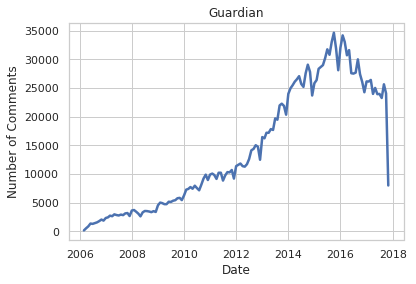

In [11]:
# Number of Comments per month of the year
ax = sns.lineplot(x = df_guardian['date'], y=df_guardian['comments_count'],linewidth=2.5, ci=None)
ax.set(xlabel='Date', ylabel='Number of Comments', title='Guardian')
save_to_pdf('./plots/guardian_comments_count.pdf', ax)

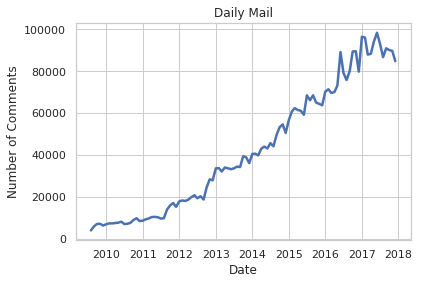

In [12]:
ax = sns.lineplot(x = df_daily['date'], y=df_daily['comments_count'],linewidth=2.5, ci=None)
ax.set(xlabel='Date', ylabel='Number of Comments', title='Daily Mail')
save_to_pdf('./plots/dailymail_comments_count.pdf', ax)


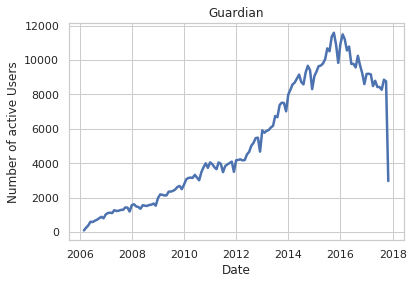

In [13]:
ax = sns.lineplot(x = df_guardian['date'], y=df_guardian['user_count'], palette="tab10", linewidth=2.5, ci=None)
ax.set(xlabel='Date', ylabel='Number of active Users', title='Guardian')
save_to_pdf('./plots/guardian_user_count.pdf', ax)

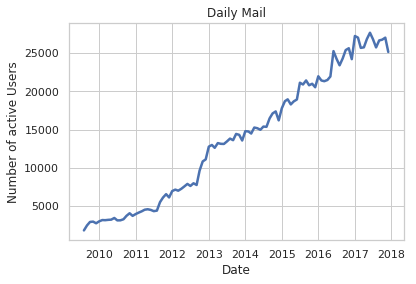

In [14]:
ax = sns.lineplot(x = df_daily['date'], y=df_daily['user_count'], palette="tab10", linewidth=2.5, ci=None)
ax.set(xlabel='Date', ylabel='Number of active Users', title='Daily Mail')
save_to_pdf('./plots/dailymail_user_count.pdf', ax)

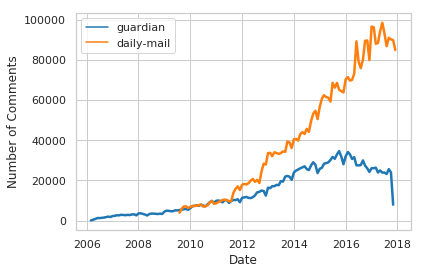

In [15]:
ax = sns.lineplot(x='date', y='value',  hue='variable', data=pd.melt(df_merge_comments, ['date']), palette="tab10", linewidth=2.5, ci=None)
# ax.set_yscale('log')
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles=handles[1:], labels=labels[1:])
ax.set(xlabel='Date', ylabel='Number of Comments')
save_to_pdf('./plots/guardian-daily_comments_count.pdf', ax)

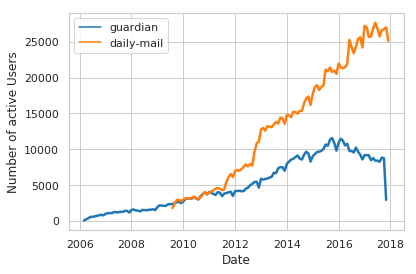

In [16]:
ax = sns.lineplot(x='date', y='value',  hue='variable', data=pd.melt(df_merge_user, ['date']), palette="tab10", linewidth=2.5, ci=None)
# ax.set_yscale('log')
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles=handles[1:], labels=labels[1:])
ax.set(xlabel='Date', ylabel='Number of active Users')
save_to_pdf('./plots/guardian-daily_user_count.pdf', ax)